<a href="https://colab.research.google.com/github/amadeu100401/atividade_pratica_machineLearning/blob/main/Atividade_Pratica_1_BolsaFamilia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática I - Análise de dados do bolsa família
* Alunos: Amadeu Martim Silva De Oliveira e Paulo Henrique Medeiros Bittencourt 

# Sobre a base de dados

> A base dados analisada trata-se do cadastro único do governo federal onde consta os dados sobre famílias e pessoas que pode ser utilizada para cadastrar pessoas em programas sociais, como por exemplo o Bolsa Família -Novo Auxílio Brasil- (Programa de transferência de renda para famílias na linha da pobreza).
Essa base dados é composta por dois arquivos, onde um é referente às familias e o outro é referente as pessoas em individual.

#Análises feitas a partir dos dados coletados

>1 -  No cenário analisado, vamos buscar uma relação com a localidade das famílias, se as mesmas vivem nos centros urbanas ou são famílias de localidades rurais, analisando também a quantidade média de membros nas famílias, bem como a renda familiar. Além disso, vamos analisar se as famílias cadastradas no bolsa família são mais indígenas, quilombolas ou não pertencentes a nenhum desses grupos.

>2 - Outro ponto analisado também, será a composição étinica do grupo de pessoas cadastradas, saíndo de um aspécto mais generalista das famílias, e indo para características pessoais de cada um, analisando sua etinia, seu grau de escolaridade, se possui algum vínculo trabalhista e quanto recebe em média.

# Links e informações úteis sobre os arquivos
* [Link sobre o guia do pesquisadores (Mais informações sobre o cadastro único)](https://aplicacoes.mds.gov.br/sagirmps/ferramentas/docs/manual_do_pesquisador_gestao_bolsa_familia_semlogo.pdf)

* [Link para baixar a base de dados](https://www.data2learning.com/repo/iachallenge/Dataset_CadastroUnico_Sergipe.zip)

* [Link para o dicionário da base familias](https://docs.google.com/spreadsheets/d/1oXwo2qdnKNLx9LcpVg7EfVLj6JS0S6Aj/edit#gid=1153103809)

* [Link para o dicionário da base pessoas](https://docs.google.com/spreadsheets/d/1oXwo2qdnKNLx9LcpVg7EfVLj6JS0S6Aj/edit#gid=732501451)

O arquivo está em formato .zip e é composto por três outros arquivos:

* data_familia_sergipe.csv: dados das famílias.
* data_pessoas_sergipe.csv: dadaos das pessoas.
* Dicionario_base_desidentificada_pt.xlsx: dicionário de dados explicando o que é cada uma dos campos das bases.

#Alguma considerações importantes: 

>* As bases de dados fornecidas para análise são referentes ao Cadastro Único do governo federal, por tanto, este cadastro pode ser usado em diversos programas governamentais, fora o Bolsa Família, tal quais como o Tarifa Social de Energia Elétrica, o Minha Casa Minha Vida e entre outros. 

>* Todas as pessoas cadastradas nas bases de dados não possuem nenhum identificação, como CPFs, RGs ou CEPs. Sendo assim, tratam-se de dados de pessoas anônimas.

>* As análises e relatório definitivo estará no final do notebook.

In [423]:
# Importação das bibliotecas
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [424]:
# Importação da base de dados familias
data_familia = pd.read_csv("/content/drive/MyDrive/Análise de dados/data_familia_sergipe.csv")
data_familia.head(5)


,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2806206,2,3,183415.0,2006-01-07,2018-09-30,58.0,2018-02-27,1.0,1.0,...,2.0,2.0,P S IVA SALGUEIRO,2421836.0,CRAS CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL,2.806200e+10,0.0,0,4,550052838636015
1,2803609,2,3,183416.0,2010-03-09,2018-09-30,190.0,2018-07-20,2.0,1.0,...,2.0,2.0,POSTO DE SAUDE RICARDO HAGENBECK,2421380.0,CRAS ANGELA MARIA DE CARVALHO LIMA BOMFIM,2.803602e+10,0.0,0,5,550245146328323
2,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879
3,2805703,2,3,183418.0,2004-05-25,2017-12-15,937.0,2017-11-09,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0,1,550405659971983
4,2805307,1,3,183419.0,2016-03-31,2018-10-15,25.0,2018-10-15,2.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550245146328323


# Requisitos para participar do bolsa família (Auxílio Brasil)


---
  1. Têm direito a receber também as famílias consideradas em situação de pobreza, que são as que têm renda entre `R$ 100,01 e R$ 200,00` mensais por pessoa. Nestas famílias, é necessário que haja gestantes, nutrizes (mães que amamentam), crianças, adolescentes ou jovens até os 21 anos incompletos.

2. Também têm direito a receber o benefício as famílias consideradas extremamente pobres, que são aquelas que têm renda mensal entre `zero e R$ 100,00 por pessoa.` (Independente da compisção das mesmas)

*fonte: [SERASA](https://www.serasa.com.br/blog/auxilio-brasil-entenda-o-programa-que-substituiu-o-bolsa-familia/?gclid=Cj0KCQjw8_qRBhCXARIsAE2AtRYLEidbbJP04WphfAsRH4R89fixl6n4huOCkDFxTpNAwO4cQXaCMRgaAuJ6EALw_wcB)*



---
#OBS:
>* Devido os requisitos apresentados, será necessário fazer algumas transformações nos dados da base de dados, haja vista que existem famílias com renda acima do permitido para a participação no programa social. Nesse caso, iremos excluir essas fmaílias, pois não cumprem os requisitos para estarem no bolsa família.

>* Não será descartados as famílias com apenas um membro cadastrado, pois pode se trarar de gestantes solteiras,e por tanto, a exclusão desses dados poderá acarretar em resultados pouco coerentes com a realidade.

>* Exitse o critério de tempo desde a ultima atualização do cadastro de cada família, que pra esse estudo, será desconsiderado.

#Algumas considerações sobre as colunas das bases da dados
>Iremos montar duas tabelas apenas com as colunas que são relevantes ao nosso estudo de caso, por tanto, iremos desconsiderar outros aspéctos, como data em que tal família se increveu no programa. 


# Legenda sobre as colunas da tabela.

Aqui está uma tabela relacionando as colunas utilizadas com suas respectivas definições e seus valores


---



| Atributo | Definição | Chave dos valores |
|:--------|:--------:|:--------:|
|id_familia| ID de identificação da família |
| cod_local_domic_fam | Se a família mora na zona urbana ou rual | 1 = Urbano e 2 = Rural |
| cod_familia_indigena_fam | Se a família é indigena | 1 = sim e 2 = não |
| ind_familia_quilombola_fam | Se a família é quilombola | 1= sim e 2 = não |
| vlr_renda_media_fam | Renda média da família | Valor em reais |
| qtde_pessoas | Quantidades de pessoas na família | |



In [425]:
#Montando uma tabela nova com as colunas que serão analisadas utilizando a base DATA_FAMÍLIA
df_familia = data_familia.iloc[:,[3,8,21,22,6,29]]
df_familia['cod_local_domic_fam'] = pd.cut(df_familia['cod_local_domic_fam'],bins=[1.0,2.0,float("inf")],right=False,labels=['Urbano','Rural'])
df_familia['cod_familia_indigena_fam'] = pd.cut(df_familia['cod_familia_indigena_fam'],bins=[1.0,2.0,float("inf")],right=False,labels=['Sim','Não'])
df_familia['ind_familia_quilombola_fam'] = pd.cut(df_familia['ind_familia_quilombola_fam'],bins=[1.0,2.0,float("inf")],right=False,labels=['Sim','Não'])

indexRenda = df_familia[df_familia['vlr_renda_media_fam'] > 200].index
df_familia.drop(indexRenda, inplace = True)

df_familia.head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,id_familia,cod_local_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,vlr_renda_media_fam,qtde_pessoas
0,183415.0,Urbano,Não,Não,58.0,4
1,183416.0,Rural,Não,Não,190.0,5
2,183417.0,Urbano,Não,Não,100.0,2
4,183419.0,Rural,Não,Não,25.0,2
5,183420.0,Urbano,Não,Não,37.0,2
6,183421.0,Rural,Não,Não,50.0,3
7,183422.0,Urbano,Não,Não,41.0,3
8,183424.0,Rural,Não,Não,50.0,3
9,183425.0,Urbano,Não,Não,50.0,1
13,183429.0,Rural,Não,Não,50.0,3


id_familia                    58517
cod_local_domic_fam           58414
cod_familia_indigena_fam      58517
ind_familia_quilombola_fam    58490
vlr_renda_media_fam           58517
qtde_pessoas                  58517
dtype: int64

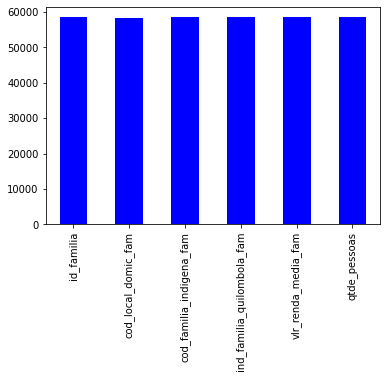

In [426]:
#Verificando balanceamento dos dados
count_ = df_familia.count()
count_.plot(kind='bar',color='blue')
count_


# Sobre a quantidade de dados
Podemos perceber que existe uma leve diferença na quantidade de dados pertencentes em cada coluna da tabela.
Porém essa diferença não afetará de forma significativa nos nossos resultados finais. 


,Local de moradia
Urbano,37315
Rural,21099


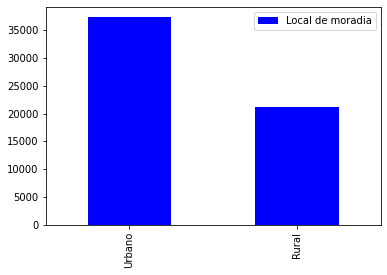

In [427]:
#Quantidade de pessoas por cada localidade
localidade= df_familia['cod_local_domic_fam'].value_counts().to_frame()
localidade.rename(columns = {'cod_local_domic_fam' : 'Local de moradia'}, inplace = True)

#Gerando gráfico
localidade.plot(kind='bar',color='blue')

localidade

,Famílias indígenas
Não,58490
Sim,27


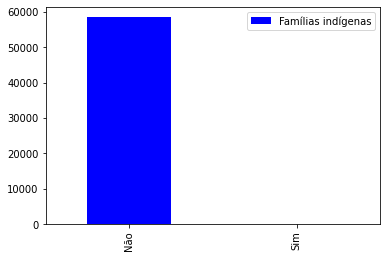

In [428]:
#Quantidade quantidade de pessoas indígenas
qtd_ind = df_familia['cod_familia_indigena_fam'].value_counts().to_frame()
qtd_ind.rename(columns = {'cod_familia_indigena_fam' : 'Famílias indígenas'}, inplace = True)

#Gerando gráfico
qtd_ind.plot(kind='bar',color='blue')

qtd_ind

,Famílias quilombolas
Não,58102
Sim,388


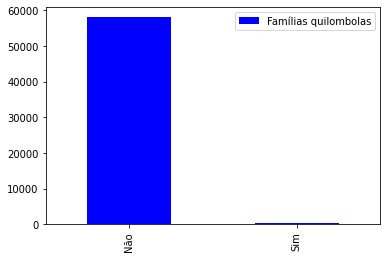

In [429]:
#Qunatidade de famílias quiombolas
qtd_qui = df_familia['ind_familia_quilombola_fam'].value_counts().to_frame()
qtd_qui.rename(columns = {'ind_familia_quilombola_fam' : 'Famílias quilombolas'}, inplace = True)

#Gerando gráfico
qtd_qui.plot(kind='bar',color='blue')

qtd_qui

Valor da renda mínima: vlr_renda_media_fam    0.0
dtype: float64
Valor da renda máxima: vlr_renda_media_fam    200.0
dtype: float64
Média da renda mensal: R$59.413572124339936


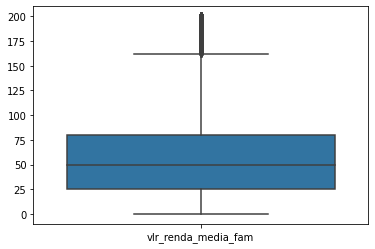

In [430]:
#Valor máximo e mínimo de renda e média
renda = df_familia[["vlr_renda_media_fam"]]
valor_media_salarial = df_familia['vlr_renda_media_fam'].mean()
print(f"Valor da renda mínima: {renda.min()}")
print(f"Valor da renda máxima: {renda.max()}")
print(f'Média da renda mensal: R${valor_media_salarial }')

#Verificando se existe outliers na renda famíliar
df_renda = df_familia.iloc[:,[4]]
sns.boxplot(data=df_renda)

Quantidade mínima de membros: qtde_pessoas    1
dtype: int64
Quantidade máxima de membros: qtde_pessoas    14
dtype: int64
Média de pessoas por família é de: 2.7022916417451337 pessoa(as)


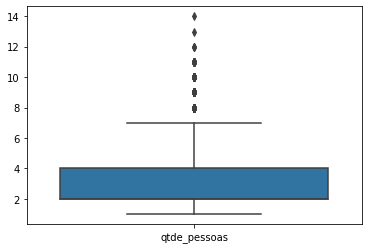

In [431]:
#Verificando o intervalo da quantidade de pessoas por família e média de pessoas
data_features = df_familia[["qtde_pessoas"]]
valor_media_pessoas = df_familia['qtde_pessoas'].mean()
print(f"Quantidade mínima de membros: {data_features.min()}")
print(f"Quantidade máxima de membros: {data_features.max()}")
print(f'Média de pessoas por família é de: {valor_media_pessoas } pessoa(as)')

#Verificando quantidade de membros na família
df_qtdPessoas = df_familia.iloc[:,[5]]
sns.boxplot(data=df_qtdPessoas)

# Extraíndo dados da base de Pessoas

In [432]:
#Importando base de dados pessoas 
data_pessoas = pd.read_csv("/content/drive/MyDrive/Análise de dados/data_pessoas_sergipe.csv")
data_pessoas

,cd_ibge,estrato,classf,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,...,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,val_renda_bruta_12_meses_memb,val_renda_doacao_memb,val_renda_aposent_memb,val_renda_seguro_desemp_memb,val_renda_pensao_alimen_memb,val_outras_rendas_memb,peso.fam,peso.pes
0,2805208,1,3,206870.0,24.0,1,19,1,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,100.0,550245146328323,563273265962979
1,2805505,2,3,1936145.0,35.0,1,17,3,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,550245146328323,563340413648347
2,2800308,2,1,4239973.0,103.0,1,4,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,550245146328323,56328235405831
3,2805604,2,3,2022175.0,324.0,2,4,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,100.0,NaN,550390600873778,563301639311753
4,2801306,2,3,2300485.0,328.0,1,7,3,2.0,2.0,...,NaN,NaN,NaN,NaN,0.0,NaN,100.0,NaN,550361832442675,563323831491962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205609,2806206,2,3,197669.0,12852035.0,1,33,2,4.0,2.0,...,1.0,12.0,3600.0,0.0,0.0,0.0,0.0,0.0,550052838636015,563276393161791
205610,2800308,2,1,4240579.0,12852064.0,1,5,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,550245146328323,56328235405831
205611,2801207,2,3,2110068.0,12852104.0,1,18,3,4.0,2.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,550381758350181,563276393161791
205612,2804508,2,3,2529321.0,12852434.0,1,56,2,4.0,1.0,...,1.0,5.0,500.0,0.0,0.0,0.0,0.0,0.0,550146136427333,563276393161791


# Legenda sobre as colunas das tabela que seram utilizadas.

Aqui está uma tabela relacionando as colunas utilizadas com suas respectivas definições e seus valores


---



| Atributo | Definição | Chave dos valores |
|:--------|:--------:|:--------:|
|cod_sexo_pessoa| Sexo da pessoas | 1 = Masculino e 2 = Feminino
| idade | Idade de cada pessoa | 
| cod_raca_cor_pessoa | Raça de cada pessoas | 1 = Branco, 2 = Preto, 3 = Amarelo e 4 = Indígena |
| cod_certidao_registrada_pessoa | Situação da certidão de nascimento de cada pessoa | 1 = Cadastrada e possua a certidão , 2 = Cadastrada mas não possui, 3 = Não cadastrada e 4 = Não sabe |
| cod_sabe_ler_escrever_memb | Se a pessoas sabe ler e escrever | 1= sim e 2 = não |
| ind_frequenta_escola_memb | Se a pessoa frequenta ou já frequentou a escola | 1 = Sim,rede pública , 2 = rede particular, 3 = Não, já frequentou e 4 = Nunca frequentou |
| cod_curso_frequenta_memb | Curso que a pessoa frequenta | Os valores para cada chave ficaram disponíveis em uma tabela abaixo:
| ***#Chave#*** | ***#Valor#*** |
| 1| creche |
| 2| Pré-escola (exceto CA) |
| 3| Classe de alfabetização (CA)|
| 4| Ensino fundamental regular (duração 8 anos)|
| 5| Ensino fundamental regular (duração 9 anos)|
| 6| Ensino fundamental especial |
| 7| Ensino médio regular |
| 8| Ensino médio especial |
| 9| Ensino fundamental EJA (1ª à 4ª) |
| 10 | Ensino médio fundamental EJA (5ª à 8ª) |
| 11 | Ensino médio EJA|
| 12 | Alfabetização p/ adultos|
| 13 | Supeior,especialização, mestrado, doutorado|
| 14 | Pré vestibular|
| NaN | Não está cursando nada |
| cod_curso_frequentou_pessoa_memb | Curso que a pessoa frequentou | Os valores para cada chave fiacaram disponíveis em uma tabela abaixo |
| ***#Chave#*** | ***#Valor#*** |
| 1| creche |
| 2| Pré-escola (exceto CA) |
| 3| Classe de alfabetização (CA)|
| 4| Ensino fundamental regular (duração 8 anos)|
| 5| Ensino fundamental regular (duração 9 anos)|
| 6| Ensino fundamental especial |
| 7| Ensino médio regular |
| 8| Ensino médio especial |
| 9| Ensino fundamental EJA (1ª à 4ª) |
| 10 | Ensino médio fundamental EJA (5ª à 8ª) |
| 11 | Ensino médio EJA|
| 12 | Alfabetização p/ adultos|
| 13 | Supeior,especialização, mestrado, doutorado|
| 14 | Pré vestibular|
| NaN | Não cursou nada |
| cod_principal_trab_memb | Função principal de cada pessoa no trabalho | Os valores de cada chave estaram em uma tabela abaixo|
| ***#Chave#*** | ***#Valor#*** |
| 1| Trabalhador por conta própia (autônomo, bico) |
|2 |Empregado sem carteira assinada|
| 3| Trabalhador temporário em área rural |
| 4| Trabalhador com carteira assinada |
| 5| Trabalhador doméstco sem carteira de trabalho|
| 6| Trabalhador doméstico com carteira de trabalho assinada|
| 7| Trabalhador não remunerado |
| 8| Militar ou servidor público |
| 9| Empregador |
| 10| Estagiário |
| 11 | Aprendiz |
| NaN | Não trabalhando |
| val_renda_bruta_12_meses_memb | Valor da renda bruta por cada pessoa nos últimos 12 meses | valor em reais



In [433]:
#Montando uma tabela nova com as colunas que serão analisadas utilizando a base DATA_PESSOAS
df_pessoas = data_pessoas.iloc[:,[5,6,8,10,12,13,15,17,23,27]]
df_pessoas['cod_sexo_pessoa'] = pd.cut(df_pessoas['cod_sexo_pessoa'],bins=[1.0,2.0,float("inf")],right=False,labels=['Masculino','Feminino'])
df_pessoas['cod_raca_cor_pessoa'] = pd.cut(df_pessoas['cod_raca_cor_pessoa'],bins=[1.0,2.0,3.0,4.0,float("inf")],right=False,labels=['Branca','Preta','Amarela','Indígena'])
df_pessoas['cod_certidao_registrada_pessoa'] = pd.cut(df_pessoas['cod_certidao_registrada_pessoa'],bins=[1.0,2.0,3.0,4.0,float("inf")],right=False,labels=['Cadastrada','Cadastrada mas não tem o documento','Não cadastrada','Não sabe'])
df_pessoas['cod_sabe_ler_escrever_memb'] = pd.cut(df_pessoas['cod_sabe_ler_escrever_memb'],bins=[1.0,2.0,float("inf")],right=False,labels=['Sabe ler/escrever','Não sabe ler/escrever'])
df_pessoas['ind_frequenta_escola_memb'] = pd.cut(df_pessoas['ind_frequenta_escola_memb'],bins=[1.0,2.0,3.0,4.0,float("inf")],right=False,labels=['Sim,rede pública','Sim, rede privada','Não, já frequentou','Nunca frequentou'])
df_pessoas['cod_curso_frequenta_memb'] = pd.cut(df_pessoas['cod_curso_frequenta_memb'],bins=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,float("inf")],right=False,labels=['Creche','Pré-escola','Classe de alfabetização','Esino fundamental regular (8 anos)','Ensino fundamental regular (9 anos)','Esino fundamental especial','Esino médio regular','Ensino médio especial','Esino fundamental EJA (1ª a 4ª)','Ensino fundamental EJA (5ª a 8ª)','Ensino médio EJA','Alfabetização p/ adultos','Supeior,especialização, mestrado, doutorado','Pré vestibular'])
df_pessoas['cod_curso_frequentou_pessoa_memb'] = pd.cut(df_pessoas['cod_curso_frequentou_pessoa_memb'],bins=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,float("inf")],right=False,labels=['Creche','Pré-escola','Classe de alfabetização','Esino fundamental regular (8 anos)','Ensino fundamental regular (9 anos)','Esino fundamental especial','Esino médio regular','Ensino médio especial','Esino fundamental EJA (1ª a 4ª)','Ensino fundamental EJA (5ª a 8ª)','Ensino médio EJA','Alfabetização p/ adultos','Supeior,especialização, mestrado, doutorado','Pré vestibular'])
df_pessoas['cod_principal_trab_memb'] = pd.cut(df_pessoas['cod_principal_trab_memb'],bins=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,float("inf")],right=False,labels=['Trabalhador por conta própia (autônomo, bico)','Empregado sem carteira assinada','Trabalhador temporário em área rural','Trabalhador com carteira assinada','Trabalhador doméstco sem carteira de trabalho','	Trabalhador doméstico com carteira de trabalho assinada','Trabalhador não remunerado','Militar ou servidor público','Empregador','Estagiário','Aprendiz'])

#Retirando pessoas com renda anual maior que 2.400 anuais (200 X 12) - Pois essas não podem fazer parte do bolsa família.
indexRenda_anual = df_pessoas[df_pessoas['val_renda_bruta_12_meses_memb'] > 2400].index
df_pessoas.drop(indexRenda_anual, inplace = True)

df_pessoas.head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,cod_sexo_pessoa,idade,cod_raca_cor_pessoa,cod_certidao_registrada_pessoa,cod_sabe_ler_escrever_memb,ind_frequenta_escola_memb,cod_curso_frequenta_memb,cod_curso_frequentou_pessoa_memb,cod_principal_trab_memb,val_renda_bruta_12_meses_memb
0,Masculino,19,Indígena,Cadastrada,Sabe ler/escrever,"Sim,rede pública",Esino médio regular,NaN,NaN,NaN
1,Masculino,17,Indígena,Cadastrada,Sabe ler/escrever,"Sim,rede pública",Esino médio regular,NaN,NaN,NaN
2,Masculino,4,Indígena,Cadastrada,Não sabe ler/escrever,Nunca frequentou,NaN,NaN,NaN,NaN
3,Feminino,4,Indígena,Cadastrada,Não sabe ler/escrever,"Sim,rede pública",Pré-escola,NaN,NaN,NaN
4,Masculino,7,Preta,Cadastrada,Sabe ler/escrever,"Sim,rede pública",Ensino fundamental regular (9 anos),NaN,NaN,NaN
5,Feminino,7,Indígena,Cadastrada,Não sabe ler/escrever,"Sim,rede pública",Ensino fundamental regular (9 anos),NaN,NaN,NaN
6,Masculino,21,Indígena,Cadastrada,Sabe ler/escrever,"Não, já frequentou",NaN,Ensino fundamental regular (9 anos),NaN,NaN
7,Masculino,11,Preta,Cadastrada,Sabe ler/escrever,"Sim,rede pública",Ensino fundamental regular (9 anos),NaN,NaN,NaN
8,Feminino,7,Indígena,Cadastrada,Não sabe ler/escrever,"Sim,rede pública",Classe de alfabetização,NaN,NaN,NaN
9,Feminino,13,Indígena,Cadastrada mas não tem o documento,Sabe ler/escrever,"Sim,rede pública",Ensino fundamental regular (9 anos),NaN,NaN,NaN


cod_sexo_pessoa                     187501
idade                               187501
cod_raca_cor_pessoa                 187450
cod_certidao_registrada_pessoa      187501
cod_sabe_ler_escrever_memb          187480
ind_frequenta_escola_memb           187480
cod_curso_frequenta_memb             66669
cod_curso_frequentou_pessoa_memb     88757
cod_principal_trab_memb              36853
val_renda_bruta_12_meses_memb        36110
dtype: int64

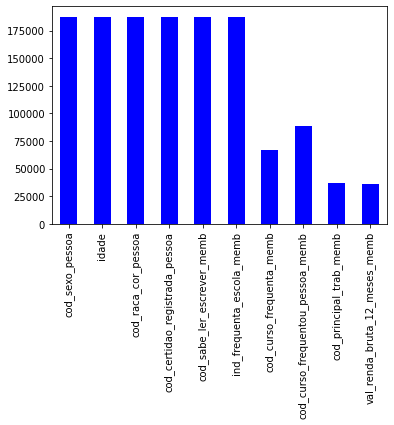

In [434]:
#Verificando balanceamento dos dados
count_ = df_pessoas.count()
count_.plot(kind='bar',color='blue')
count_

# Sobre a quantidade de dados
Podemos perceber aqui algumas diferenças numéricas nas quantidades de certas tabelas. Porém, mesmo sendo valores elevados, são tabelas que caso não preenchidas indicam que aquela coluna pode não representar especificamente uma pessoa, por exemplo, a coluna *cod_curso_frequenta_memb* representa apenas as pessoas que estam frequentando um curso atualmente. Por isso, não será necessarimente preciso realizar nenhum tratamento nesses dados. Em contra partida, nas colunas  ***cod_sexo_pessoa	idade	cod_raca_cor_pessoa	cod_certidao_registrada_pessoa	cod_sabe_ler_escrever_memb	ind_frequenta_escola_memb***, onde não poderia haver uma discrepância muito acentuada, podemos ver que os números estão com pequenas diferenças que não influênciarão nos resultados

# Fazendo a contagem dos elementos por cada coluna

,cod_sexo_pessoa
Feminino,107522
Masculino,79979


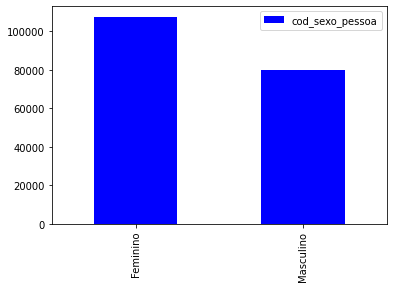

In [435]:
#Quantidade de pessoas de cada sexo
qtd_sexo = df_pessoas['cod_sexo_pessoa'].value_counts().to_frame()
c = qtd_sexo
c.plot(kind="bar",color="blue")
qtd_ind.rename(columns = {'cod_sexo_pessoa' : 'Sexo'}, inplace = True)

qtd_sexo

In [436]:
#Valor faixa de idades
idade = df_pessoas[["idade"]]
#Renda das famílias
valor_media_idade = df_pessoas['idade'].mean()
print(f"Valor da idade: {idade.min()}")
print(f"Valor da idade máxima: {idade.max()}")
print(f'Média de idade das pessoas cadastradas é de:{valor_media_idade } anos')

Valor da idade: idade    0
dtype: int64
Valor da idade máxima: idade    112
dtype: int64
Média de idade das pessoas cadastradas é de:24.765329251577324 anos


,Raça
Indígena,152524
Branca,25231
Preta,8737
Amarela,958


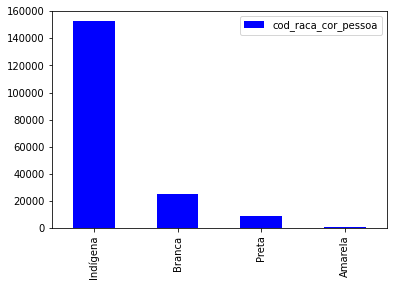

In [437]:
#Quantidade de pessoas de cada raça
qtd_raca = df_pessoas['cod_raca_cor_pessoa'].value_counts().to_frame()
c = qtd_raca
c.plot(kind="bar",color="blue")
qtd_raca.rename(columns = {'cod_raca_cor_pessoa' : 'Raça'}, inplace = True)

qtd_raca


,Situação dos registros de nascimento
Cadastrada,167275
Cadastrada mas não tem o documento,20200
Não cadastrada,26
Não sabe,0


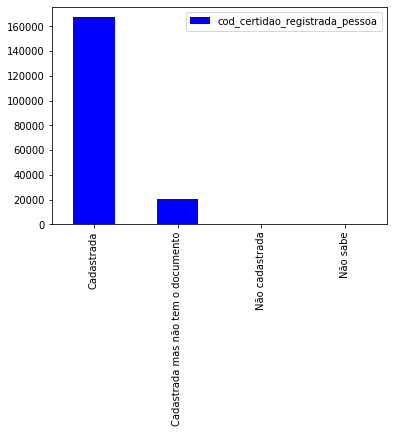

In [438]:
#Situação dos registrados de nascimento de cada pessoa
qtd_registro = df_pessoas['cod_certidao_registrada_pessoa'].value_counts().to_frame()
c = qtd_registro
c.plot(kind="bar",color="blue")
qtd_registro.rename(columns = {'cod_certidao_registrada_pessoa' : 'Situação dos registros de nascimento'}, inplace = True)

qtd_registro

,Situação quanto a leitura e escrita
Sabe ler/escrever,134013
Não sabe ler/escrever,53467


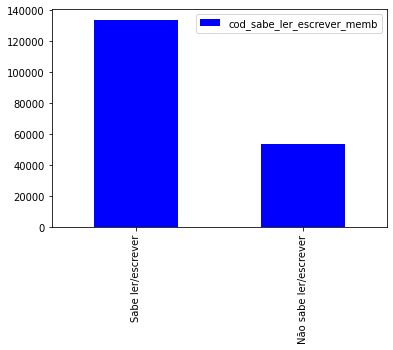

In [439]:
#Situação das pessoas quanto a ler e escrever
qtd_ler = df_pessoas['cod_sabe_ler_escrever_memb'].value_counts().to_frame()
c = qtd_ler
c.plot(kind="bar",color="blue")
qtd_ler.rename(columns = {'cod_sabe_ler_escrever_memb' : 'Situação quanto a leitura e escrita'}, inplace = True)


qtd_ler

,Situação quanto a ida à escola
"Não, já frequentou",88769
"Sim,rede pública",58882
Nunca frequentou,32031
"Sim, rede privada",7798


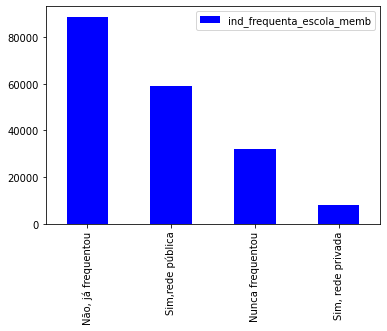

In [440]:
#Situação das pessoas quanto a ida à escola
qtd_escola = df_pessoas['ind_frequenta_escola_memb'].value_counts().to_frame()
c = qtd_escola
c.plot(kind="bar",color="blue")
qtd_escola.rename(columns = {'ind_frequenta_escola_memb' : 'Situação quanto a ida à escola'}, inplace = True)

qtd_escola

,Situação de pessoas que cursam algo atualmente
Ensino fundamental regular (9 anos),42382
Esino médio regular,8497
Esino fundamental regular (8 anos),5125
Pré-escola,4764
Classe de alfabetização,1388
Ensino fundamental EJA (5ª a 8ª),1343
Creche,1286
Ensino médio EJA,625
"Supeior,especialização, mestrado, doutorado",508
Esino fundamental EJA (1ª a 4ª),289


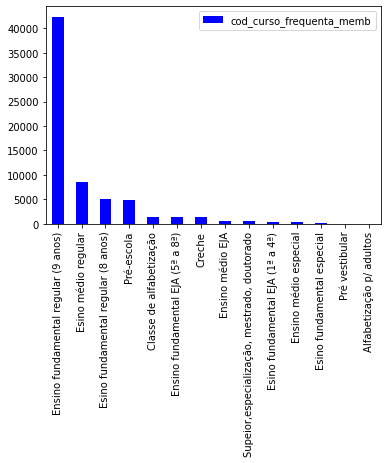

In [441]:
#Situação de pessoas que cursam algo atualmente
qtd_cursando = df_pessoas['cod_curso_frequenta_memb'].value_counts().to_frame()
c = qtd_cursando
c.plot(kind="bar",color="blue")
qtd_cursando.rename(columns = {'cod_curso_frequenta_memb' : 'Situação de pessoas que cursam algo atualmente'}, inplace = True)

qtd_cursando

,Situação de pessoas que já cursaram algo
Esino fundamental regular (8 anos),28042
Ensino médio especial,26408
Ensino fundamental regular (9 anos),22608
Esino fundamental especial,6441
"Supeior,especialização, mestrado, doutorado",1375
Esino fundamental EJA (1ª a 4ª),959
Ensino médio EJA,695
Classe de alfabetização,559
Alfabetização p/ adultos,517
Esino médio regular,461


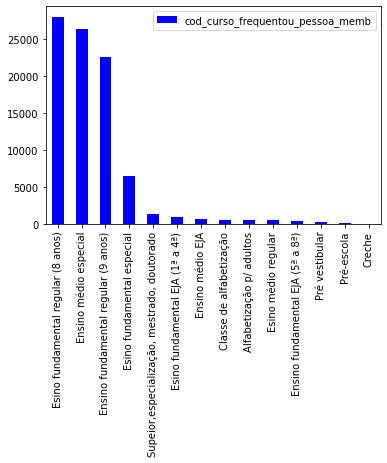

In [442]:
#Situação de pessoas que já cursaram algo
qtd_cursou = df_pessoas['cod_curso_frequentou_pessoa_memb'].value_counts().to_frame()
c = qtd_cursou
c.plot(kind="bar",color="blue")
qtd_cursou.rename(columns = {'cod_curso_frequentou_pessoa_memb' : 'Situação de pessoas que já cursaram algo'}, inplace = True)

qtd_cursou

,Situação de cargo e situação trabalhista das pessoas
"Trabalhador por conta própia (autônomo, bico)",20191
Empregado sem carteira assinada,14767
Trabalhador não remunerado,621
Trabalhador doméstco sem carteira de trabalho,496
Trabalhador com carteira assinada,351
Trabalhador temporário em área rural,288
Militar ou servidor público,44
Aprendiz,38
Estagiário,30
\tTrabalhador doméstico com carteira de trabalho assinada,25


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


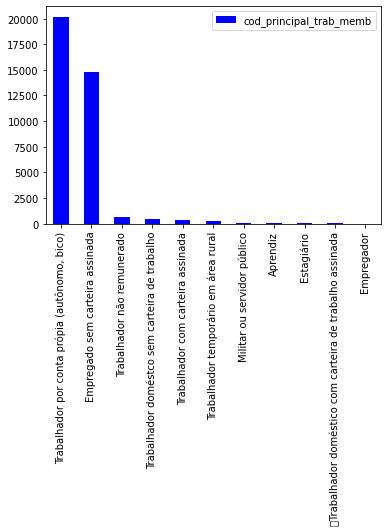

In [443]:
#Situação de cargo e situação trabalhista das pessoas
qtd_trabalho = df_pessoas['cod_principal_trab_memb'].value_counts().to_frame()
c = qtd_trabalho
c.plot(kind="bar",color="blue")
qtd_trabalho.rename(columns = {'cod_principal_trab_memb' : 'Situação de cargo e situação trabalhista das pessoas'}, inplace = True)

qtd_trabalho



In [444]:
#Valor máximo e mínimo de renda e média
rendap = df_pessoas[["val_renda_bruta_12_meses_memb"]]
valor_media_renda = df_pessoas['val_renda_bruta_12_meses_memb'].mean()
print(f"Valor da renda anual mínima: {rendap.min()}")
print(f"Valor da renda anual máxima: {rendap.max()}")
print(f'Média da renda anual: R${valor_media_renda }')

Valor da renda anual mínima: val_renda_bruta_12_meses_memb    0.0
dtype: float64
Valor da renda anual máxima: val_renda_bruta_12_meses_memb    2400.0
dtype: float64
Média da renda anual: R$1019.7057324840764


# Análises feitas a partir dos resultados obitidos


---

As análises serão feitas em duas etapas: 
>* A primeira será feita para os dados obtidos nas análises do grupo de famílias.

>* A segunda etapa será feita por meio dos dados obtidos nas análises do grupo de pessoas individuais. 